<a href="https://colab.research.google.com/github/UmeSalmaKhan/Task-1-Prediction-using-Supervised-ML/blob/main/Ume_Salma_Khan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df = pd.read_excel('Transactions datasheet.xlsx')

In [ ]:
df.head()

,t,success,mid,pmt,pg,sub_type,hr,bank
0,2,1,zivame,NB,PAYU,NaN,2020-02-14 06,NB_CITI
1,1,0,urbanclap,NB,PAYTM,NaN,2020-02-14 06,NB_SYNB
2,5,1,pharmeasytech,WALLET,AIRTELMONEY,REDIRECT_WALLET_DEBIT,2020-02-14 11,AIRTELMONEY
3,1,1,pharmeasytech,CARD,PAYU,NaN,2020-02-14 12,THE SATARA SAHAKARI BANK LTD MUMBAI
4,1,1,fanfight,CARD,RAZORPAY,NaN,2020-02-14 06,DCB


In [ ]:
df.tail()

,t,success,mid,pmt,pg,sub_type,hr,bank
19302,1,1,fanfight,CARD,RAZORPAY,NaN,2020-02-12 03,Oriental Bank of Commerce
19303,1,0,zivame,CARD,HDFC,NaN,2020-02-12 02,Oriental Bank of Commerce
19304,1,0,drivezy,CARD,GOCASHFREE,NaN,2020-02-12 05,Oriental Bank of Commerce
19305,1,1,drivezy,CARD,GOCASHFREE,NaN,2020-02-14 14,Oriental Bank of Commerce
19306,1,1,zivame,CARD,HDFC,NaN,2020-02-12 15,Oriental Bank of Commerce


In [ ]:
df.shape

(19307, 8)

In [ ]:
df.describe()

,t,success
count,19307.000000,19307.000000
mean,11.730201,7.728492
std,53.396990,38.175935
min,1.000000,0.000000
25%,1.000000,1.000000
50%,2.000000,1.000000
75%,6.000000,4.000000
max,3365.000000,2524.000000


In [ ]:
df.columns

Index(['t', 'success', 'mid', 'pmt', 'pg', 'sub_type', 'hr', 'bank'], dtype='object')

In [ ]:
df.isnull().sum()

t               0
success         0
mid             0
pmt             0
pg             37
sub_type    16404
hr              0
bank          338
dtype: int64

In [ ]:
df = df.drop(['sub_type'], axis = 1)

In [ ]:
df.isnull().sum()

t            0
success      0
mid          0
pmt          0
pg          37
hr           0
bank       338
dtype: int64

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [ ]:
success_rate = []
for i in range(len(df)):
  success_rate = (df['success']*100)/df['t']

df['success_rate'] = success_rate

In [ ]:
df.head()

,t,success,mid,pmt,pg,hr,bank,success_rate
0,2,1,zivame,NB,PAYU,2020-02-14 06,NB_CITI,50.0
1,1,0,urbanclap,NB,PAYTM,2020-02-14 06,NB_SYNB,0.0
2,5,1,pharmeasytech,WALLET,AIRTELMONEY,2020-02-14 11,AIRTELMONEY,20.0
3,1,1,pharmeasytech,CARD,PAYU,2020-02-14 12,THE SATARA SAHAKARI BANK LTD MUMBAI,100.0
4,1,1,fanfight,CARD,RAZORPAY,2020-02-14 06,DCB,100.0


In [ ]:
np.sort(df.success_rate.unique())

array([  0.        ,   2.85714286,   3.125     , ...,  96.77419355,
        97.05882353, 100.        ])

In [ ]:
df_new = df.drop(['t', 'success'], axis = 1)

Considering success rate less than 75% as less success rate

In [ ]:
df_final = df_new[df_new['success_rate'] <= 75]

In [ ]:
df_final.shape

(9614, 6)

In [ ]:
df_final[['Date','hr']] = df_final['hr'].str.split(' ',expand=True)

In [ ]:
df_final.head()

,mid,pmt,pg,hr,bank,success_rate,Date
0,zivame,NB,PAYU,06,NB_CITI,50.0,2020-02-14
1,urbanclap,NB,PAYTM,06,NB_SYNB,0.0,2020-02-14
2,pharmeasytech,WALLET,AIRTELMONEY,11,AIRTELMONEY,20.0,2020-02-14
6,fanfight,CARD,GOCASHFREE,09,Abhyudaya Cooperative Bank,50.0,2020-02-14
10,urbanclap,NB,PAYTM,03,NB_CSB,0.0,2020-02-14


In [ ]:
merchant_count = df_final.mid.value_counts()
merchant_count

fanfight          1774
medlife_prod      1342
pharmeasytech     1324
drivezy           1315
urbanclap         1289
purplle.com        996
zivame             974
countrydelight     600
Name: mid, dtype: int64

Text(0, 0.5, 'Number of transactions')

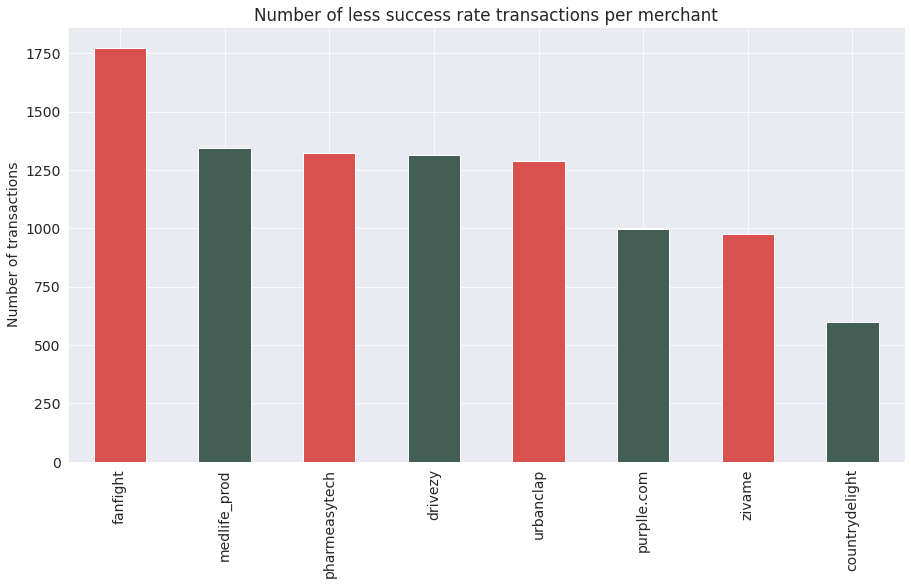

In [ ]:
merchant_count.plot(kind = 'bar', color = ["#D9514EFF", "#435E55FF"], figsize=(15, 8))
plt.title("Number of less success rate transactions per merchant")
plt.ylabel("Number of transactions")

In [ ]:
payment_method = df_final.pmt.value_counts()
payment_method

CARD                4063
NB                  3099
WALLET              1810
UPI                  618
CONSUMER_FINANCE      24
Name: pmt, dtype: int64

Text(0, 0.5, 'Number of transactions')

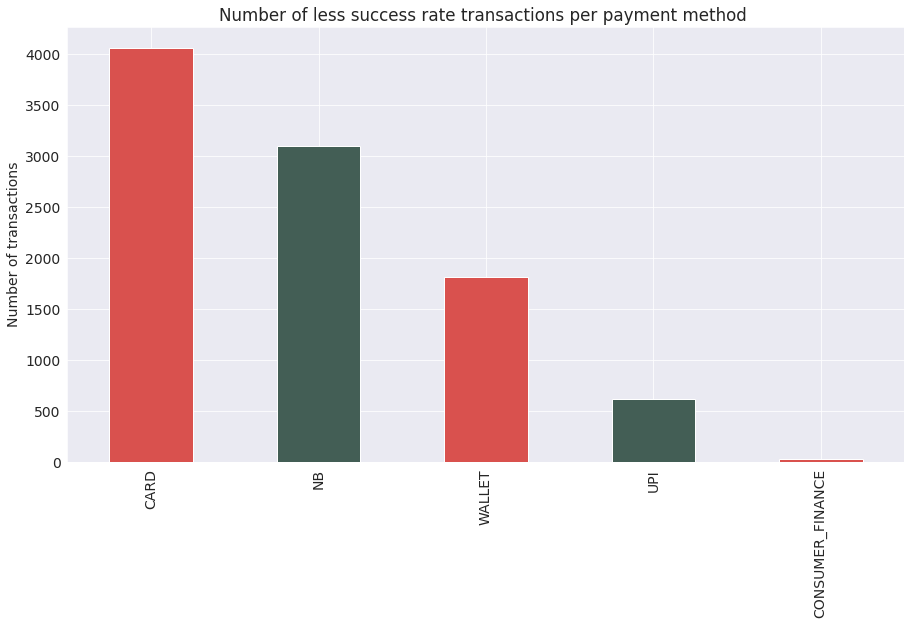

In [ ]:
payment_method.plot(kind = 'bar', color = ["#D9514EFF", "#435E55FF"], figsize=(15, 8))
plt.title("Number of less success rate transactions per payment method ")
plt.ylabel("Number of transactions")

In [ ]:
payment_gateaway = df_final.pg.value_counts()
payment_gateaway

PAYU              2119
PAYTM             2110
RAZORPAY          1640
GOCASHFREE        1084
TPSL               599
PAYTM_V2           487
PAYPAL             337
HDFC               252
MOBIKWIK           205
PHONEPE            201
AMAZONPAY          124
FREECHARGE         122
OLAPOSTPAID         82
PAYTM_UPI           63
ZAAKPAY             45
AIRTELMONEY         38
IPG                 31
EPAYLATER           22
FSS_ATM_PIN_V2      16
Name: pg, dtype: int64

In [ ]:
df_final.pg.unique()

array(['PAYU', 'PAYTM', 'AIRTELMONEY', 'GOCASHFREE', 'RAZORPAY', 'HDFC',
       'TPSL', nan, 'EPAYLATER', 'FSS_ATM_PIN_V2', 'PAYTM_V2',
       'PAYTM_UPI', 'ZAAKPAY', 'PAYPAL', 'PHONEPE', 'MOBIKWIK', 'IPG',
       'AMAZONPAY', 'FREECHARGE', 'OLAPOSTPAID'], dtype=object)

Text(0, 0.5, 'Number of transactions')

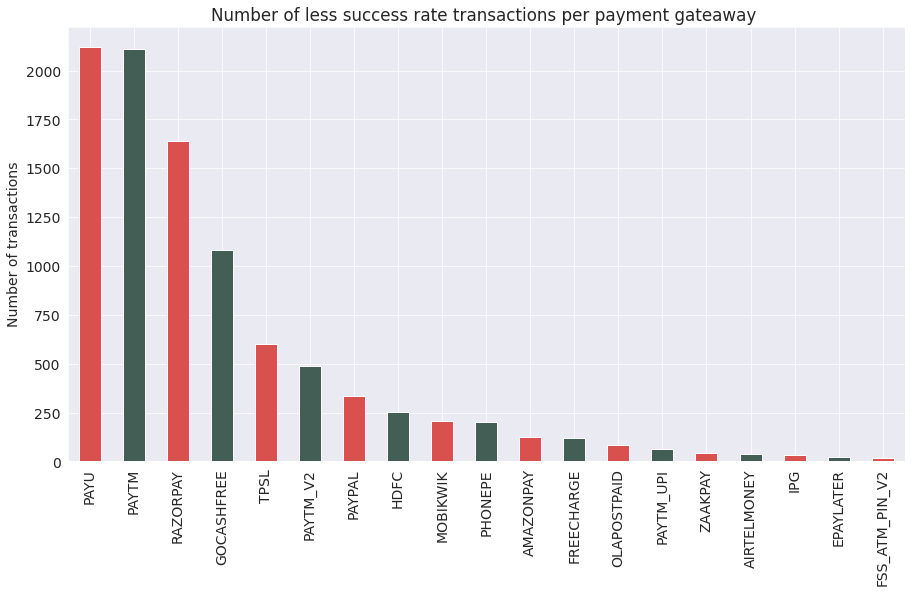

In [ ]:
payment_gateaway.plot(kind = 'bar', color = ["#D9514EFF", "#435E55FF"], figsize=(15, 8))
plt.title("Number of less success rate transactions per payment gateaway ")
plt.ylabel("Number of transactions")

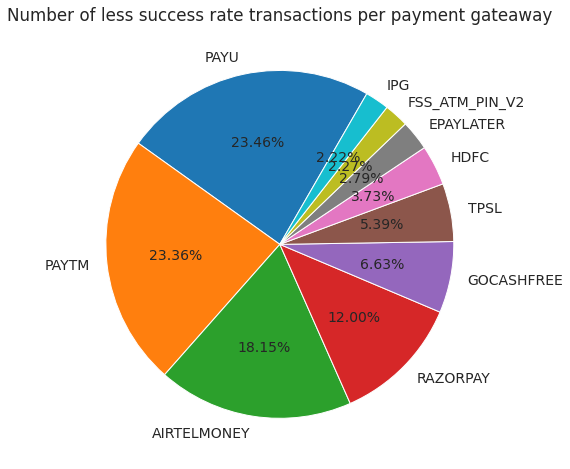

In [ ]:
labels = ['PAYU', 'PAYTM', 'AIRTELMONEY', 'RAZORPAY', 'GOCASHFREE', 'TPSL',
       'HDFC', 'EPAYLATER', 'FSS_ATM_PIN_V2', 'IPG']
plt.pie(payment_gateaway[0:10], labels = labels, startangle=60, autopct='%1.2f%%')
plt.title("Number of less success rate transactions per payment gateaway")
fig = plt.gcf()
fig.set_size_inches(8, 8)

In [ ]:
payment_hour = df_final.hr.value_counts()
payment_hour

15    571
14    545
06    539
05    534
08    533
07    533
12    516
13    515
09    514
11    504
10    498
16    475
04    469
03    424
17    407
02    369
18    354
19    280
01    267
20    217
00    179
21    156
22    109
23    106
Name: hr, dtype: int64

Text(0, 0.5, 'Number of transactions')

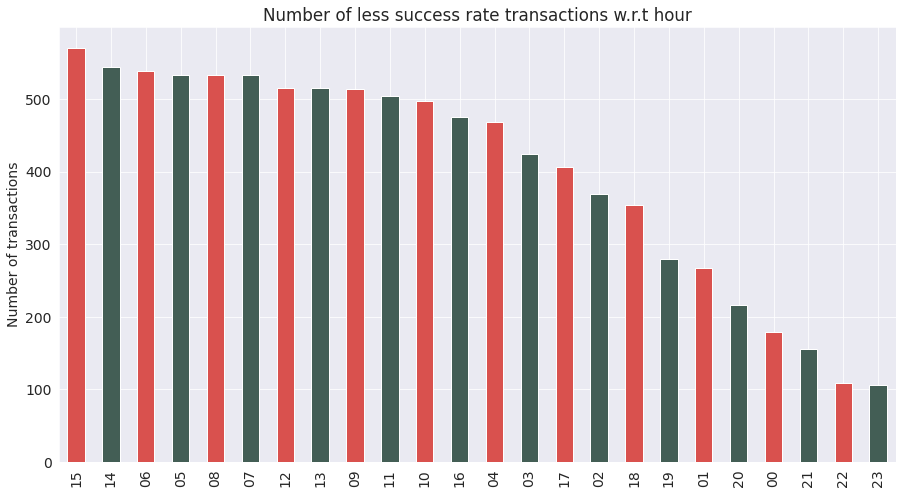

In [ ]:
payment_hour.plot(kind = 'bar', color = ["#D9514EFF", "#435E55FF"], figsize=(15, 8))
plt.title("Number of less success rate transactions w.r.t hour")
plt.ylabel("Number of transactions")

In [ ]:
payment_bank = df_final.bank.value_counts()
payment_bank = payment_bank[0:10]
payment_bank

UPI                    616
PAYTM                  534
NB_SBI                 438
PAYPAL                 337
NB_HDFC                310
NB_AXIS                296
NB_ICICI               287
Kotak Mahindra Bank    236
HDFC Bank              231
SBI                    227
Name: bank, dtype: int64

Text(0, 0.5, 'Number of transactions')

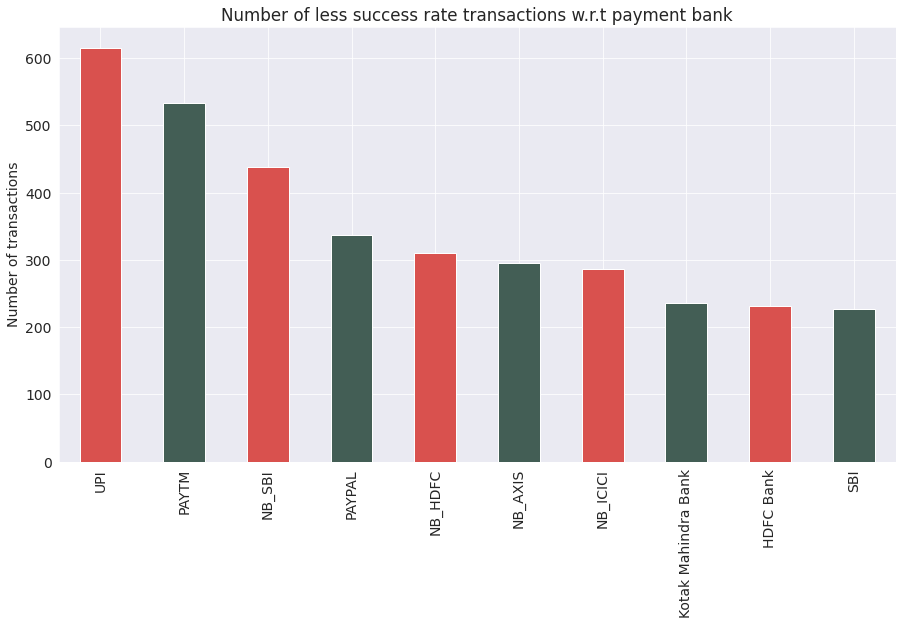

In [ ]:
payment_bank.plot(kind = 'bar', color = ["#D9514EFF", "#435E55FF"], figsize=(15, 8))
plt.title("Number of less success rate transactions w.r.t payment bank")
plt.ylabel("Number of transactions")

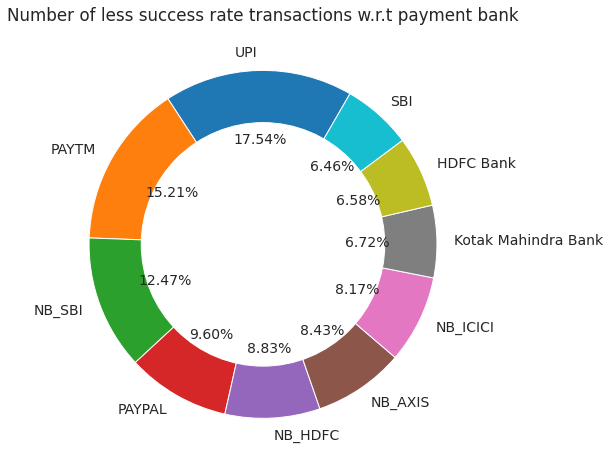

In [ ]:
labels = ['UPI', 'PAYTM', 'NB_SBI', 'PAYPAL', 'NB_HDFC', 'NB_AXIS', 'NB_ICICI', 'Kotak Mahindra Bank', 'HDFC Bank', 'SBI']
plt.pie(payment_bank, labels = labels, startangle=60, autopct='%1.2f%%')
centre_circle = plt.Circle((0, 0.0), 0.70, fc='white')
plt.title("Number of less success rate transactions w.r.t payment bank")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
fig.set_size_inches(8, 8)


## **Insights**

There are columns 19307, and 8 rows 
The less succes rate is 75% 

###GATEWAY-
- **Less success rate ** transctions where high in IPG, FSS ATM PIN V2, EPAYLATER,HDFC, TPSL, GOCASH.
- **Avg less succes rate ** transaction where in Razorpay and Airtel Money.
- **High success rate ** transaction where in Ptm and PAYU.

### PAYMENT METHOD-
**Highest Less Success Rate Transations:**
*   Consumer Finance
*   UPI

### MERCHANT-
**Highest less success rate transactions per Merchant is** - Country Delight and Zivame





# **How could we have detected this issue before the merchant reported?**

Keep a track of transactions happining, focus on duration of transactions, and 
failer of transactions happening.


To keep track set an Alert to such kind of transactions so that the Technical team will get updates before Merchant complains and also the issue will be resolved soon. [**ML based anomaly deduction algorithms for deducting Payment Failure Alert**]

**We can use Statistical Techniques to deduct failure if transactions such as-**
*   Z-score
*   Modified Z-score
*   Interquartile Range




